In [1]:
import braidz_analysis as bz
import matplotlib.pyplot as plt

2025-01-02 14:49:17,571 [INFO] 
Limited Linear Model Support Detected! 
---> PYCHEBFUN is not installed. 
---> Install pychebfun to use chebfun derivatives (https://github.com/pychebfun/pychebfun/) 
You can still use other methods 



In [2]:
root_folder = "/home/buchsbaum/mnt/nfc3008/md0/Experiments/"
exp_file = ["20241216_123918.braidz"]
exp_data = bz.braidz.read_braidz(root_folder + exp_file[0])

In [3]:
stim_raw_data = bz.processing.get_stim_or_opto_data(
    exp_data["df"], exp_data["stim"], duration=50
)
stim_centered_data = bz.processing.get_stim_or_opto_response_data(
    exp_data["df"], exp_data["stim"], duration=50
)

In [9]:
stim_centered_data.keys()

dict_keys(['angular_velocity', 'linear_velocity', 'position', 'heading_difference', 'frames_in_radius', 'sham', 'reaction_delay', 'responsive'])

In [10]:
stim_centered_data_less_than_15, stim_centered_data_more_than_15 = (
    bz.filtering.filter_by_frames_in_radius(stim_centered_data)
)

KeyError: 'frames_in_opto_radius'

In [7]:
stim_centered_data_more_than_15

{'angular_velocity': array([[-0.21955328, -0.33344007, -0.59154356, ...,  3.74882594,
          2.27170601,  1.2816173 ],
        [-0.36381017, -0.69534655, -1.14981519, ...,  2.19442695,
          1.73153622,  1.13725597],
        [24.86052355, 25.23645611, 23.78016648, ...,  2.71903263,
          2.64768273,  2.4304009 ],
        ...,
        [-2.03778852, -2.05212489, -1.93638827, ..., -2.29034349,
         -1.896378  , -1.32085653],
        [17.22509839, 15.34307421, 13.13104766, ..., -0.20991187,
          0.25858135,  0.5751746 ],
        [ 1.02425886,  0.52577286,  0.30360679, ...,  1.35764062,
          2.28226592,  3.37075991]], shape=(11, 150)),
 'linear_velocity': array([[0.23288003, 0.23345136, 0.22890145, ..., 0.20713246, 0.20091458,
         0.1932121 ],
        [0.09927009, 0.09309254, 0.08626307, ..., 0.25109068, 0.25421662,
         0.25242134],
        [0.05989058, 0.05980995, 0.06506589, ..., 0.1638918 , 0.16257624,
         0.16106706],
        ...,
        [0.19149

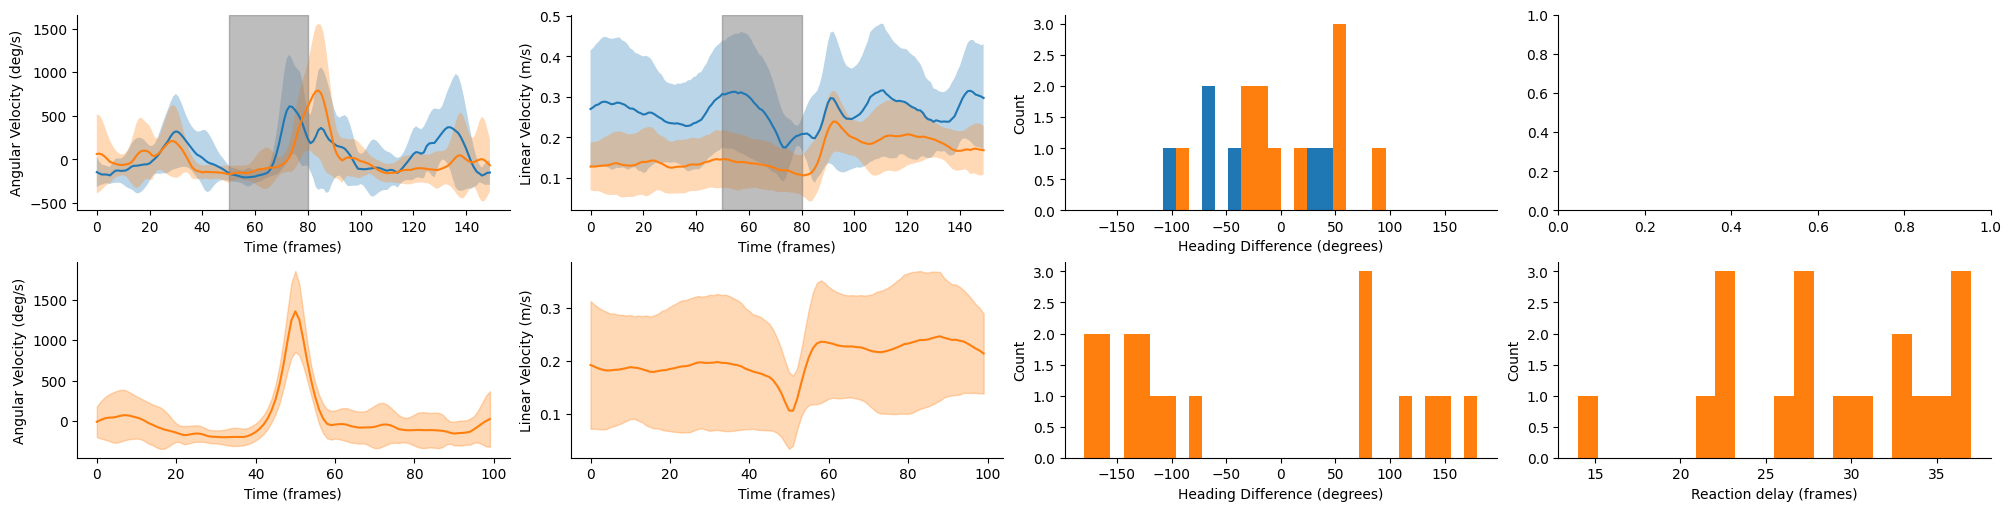

In [8]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 5), constrained_layout=True)

bz.plotting.plot_angular_velocity(
    stim_centered_data_less_than_15,
    axs[0, 0],
    convert_to_degrees=True,
    use_abs=True,
    baseline_range=(0, 50),
)
bz.plotting.plot_linear_velocity(stim_centered_data_less_than_15, axs[0, 1])
bz.plotting.plot_heading_difference(
    stim_centered_data_less_than_15, axs[0, 2], convert_to_degrees=True
)

bz.plotting.plot_angular_velocity(
    stim_centered_data_more_than_15,
    axs[0, 0],
    convert_to_degrees=True,
    use_abs=True,
    baseline_range=(0, 50),
)
bz.plotting.plot_linear_velocity(stim_centered_data_more_than_15, axs[0, 1])
bz.plotting.plot_heading_difference(
    stim_centered_data_more_than_15, axs[0, 2], convert_to_degrees=True
)

bz.plotting.plot_angular_velocity(
    stim_centered_data,
    axs[1, 0],
    convert_to_degrees=True,
    use_abs=True,
    baseline_range=(0, 50),
    color="tab:orange",
    shaded_region=None,
)
bz.plotting.plot_linear_velocity(
    stim_centered_data, axs[1, 1], color="tab:orange", shaded_region=None
)
bz.plotting.plot_heading_difference(
    stim_centered_data, axs[1, 2], convert_to_degrees=True, color="tab:orange"
)
bz.plotting.plot_histogram(
    stim_centered_data["reaction_delay"],
    axs[1, 3],
    bins=20,
    color="tab:orange",
)

for ax in axs.flatten():
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

axs[1, 3].set_xlabel("Reaction delay (frames)")
axs[1, 3].set_ylabel("Count")
plt.show()